In [3]:
import jax.numpy as jnp

def metric(x, y):
    return jnp.linalg.norm(x - y)

def open_ball(points, center, r):
    dists = jnp.linalg.norm(points - center, axis=1)
    return points[dists < r]
def is_open_set(points, U, eps=0.05):
    """
    points: all sampled points in the ambient space
    U: subset of points representing candidate open set
    eps: radius used to approximate openness
    """
    for x in U:
        ball = open_ball(points, x, eps)
        # Check: is the ball contained in U?
        # (We use broadcasting to compare points)
        contained = jnp.any(jnp.all(ball[:, None] == U[None, :], axis=-1), axis=1)
        if not jnp.all(contained):
            return False
    return True


In [4]:
# Ambient space
points = jnp.linspace(-1., 1., 500).reshape(-1, 1)

# Candidate open set: (-0.5, 0.5)
U = points[(points[:,0] > -0.5) & (points[:,0] < 0.5)]

print(is_open_set(points, U))  # True


False


In [5]:
# Closed interval: [-0.5, 0.5]
U_closed = points[(points[:,0] >= -0.5) & (points[:,0] <= 0.5)]

print(is_open_set(points, U_closed))  # False


False


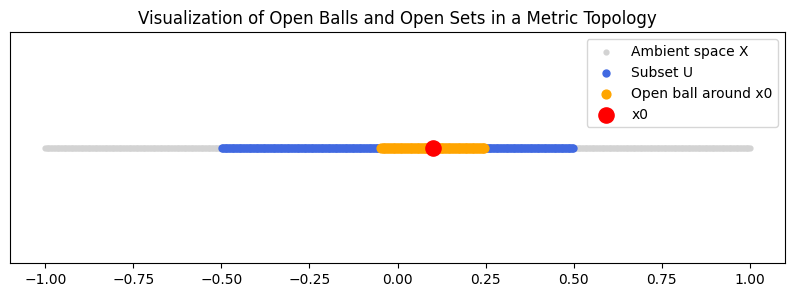

In [6]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

# 1. Ambient space of points in R
points = jnp.linspace(-1., 1., 500)

# 2. Candidate open set U = (-0.5, 0.5)
U = points[(points > -0.5) & (points < 0.5)]

# 3. Pick a point inside U
x0 = 0.1

# 4. Choose an epsilon for the open ball
eps = 0.15
ball_mask = jnp.abs(points - x0) < eps
ball_points = points[ball_mask]

# Plotting
plt.figure(figsize=(10, 3))

# Draw ambient points
plt.scatter(points, jnp.zeros_like(points),
            s=12, color="lightgray", label="Ambient space X")

# Draw U
plt.scatter(U, jnp.zeros_like(U),
            s=25, color="royalblue", label="Subset U")

# Draw open ball B(x0, eps)
plt.scatter(ball_points, jnp.zeros_like(ball_points),
            s=40, color="orange", label="Open ball around x0")

# Mark center point x0
plt.scatter([x0], [0], s=120, color="red", label="x0")

plt.yticks([])
plt.legend()
plt.title("Visualization of Open Balls and Open Sets in a Metric Topology")
plt.show()


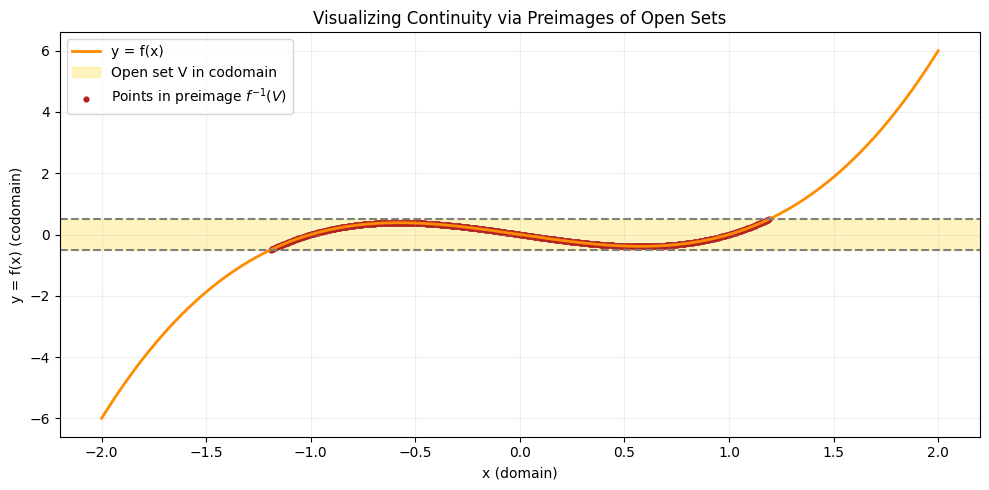

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------
# 1. Define a continuous function f: R -> R
# ------------------------------------------------------
def f(x):
    return x**3 - x   # smooth, continuous function

# ------------------------------------------------------
# 2. Sample points from the domain
# ------------------------------------------------------
x = np.linspace(-2, 2, 1000)
y = f(x)

# ------------------------------------------------------
# 3. Define an open set V in the codomain
#    Here: V = (a, b) = (-0.5, 0.5)
# ------------------------------------------------------
a, b = -0.5, 0.5

# Preimage mask: select x where f(x) is in the open interval (a, b)
mask = (y > a) & (y < b)

# ------------------------------------------------------
# 4. Plot the visualization
# ------------------------------------------------------
plt.figure(figsize=(10, 5))

# Graph of f
plt.plot(x, y, color="darkorange", linewidth=2, label="y = f(x)")

# Shade the open set V in the codomain (horizontal strip)
plt.axhspan(a, b, color="gold", alpha=0.25, label="Open set V in codomain")

# Highlight points whose image lies in V  => f^{-1}(V)
plt.scatter(x[mask], y[mask], s=12, color="firebrick",
            label="Points in preimage $f^{-1}(V)$")

# Horizontal dashed lines for boundaries of V
plt.axhline(a, linestyle="--", color="gray")
plt.axhline(b, linestyle="--", color="gray")

plt.xlabel("x (domain)")
plt.ylabel("y = f(x) (codomain)")
plt.title("Visualizing Continuity via Preimages of Open Sets")

plt.legend(loc="upper left")
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


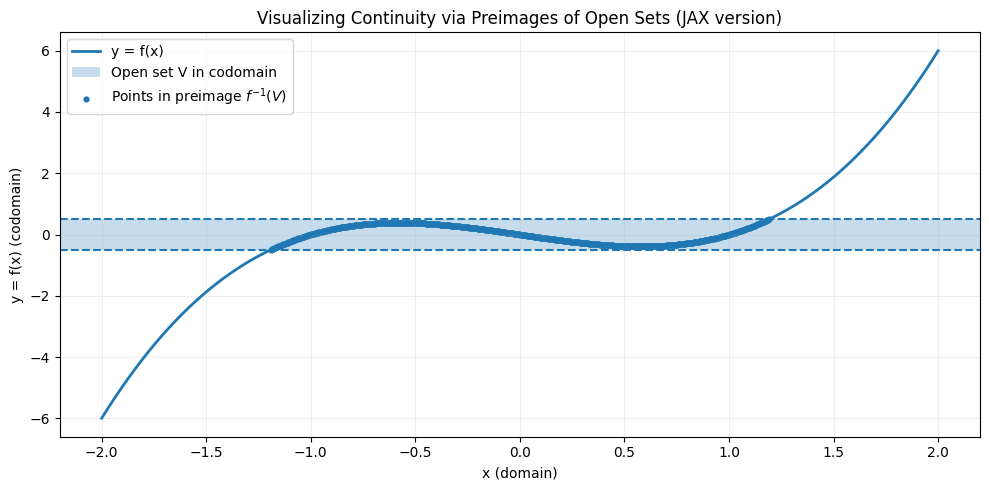

In [9]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np  # just for converting to regular NumPy for plotting

# ------------------------------------------------------
# 1. Define a continuous function f: R -> R using JAX
# ------------------------------------------------------
def f(x):
    return x**3 - x  # smooth, continuous

# ------------------------------------------------------
# 2. Sample points from the domain (in JAX)
# ------------------------------------------------------
x = jnp.linspace(-2.0, 2.0, 1000)
y = f(x)

# ------------------------------------------------------
# 3. Define an open set V in the codomain
#    Here: V = (a, b) = (-0.5, 0.5)
# ------------------------------------------------------
a, b = -0.5, 0.5

# Preimage mask: select x where f(x) is in the open interval (a, b)
mask = (y > a) & (y < b)

# Convert JAX arrays to NumPy arrays for Matplotlib
x_np = np.asarray(x)
y_np = np.asarray(y)
mask_np = np.asarray(mask)

# ------------------------------------------------------
# 4. Plot the visualization
# ------------------------------------------------------
plt.figure(figsize=(10, 5))

# Graph of f
plt.plot(x_np, y_np, linewidth=2, label="y = f(x)")

# Shade the open set V in the codomain (horizontal strip)
plt.axhspan(a, b, alpha=0.25, label="Open set V in codomain")

# Highlight points whose image lies in V  => f^{-1}(V)
plt.scatter(x_np[mask_np], y_np[mask_np], s=12,
            label="Points in preimage $f^{-1}(V)$")

# Horizontal dashed lines for boundaries of V
plt.axhline(a, linestyle="--")
plt.axhline(b, linestyle="--")

plt.xlabel("x (domain)")
plt.ylabel("y = f(x) (codomain)")
plt.title("Visualizing Continuity via Preimages of Open Sets (JAX version)")
plt.legend(loc="upper left")
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


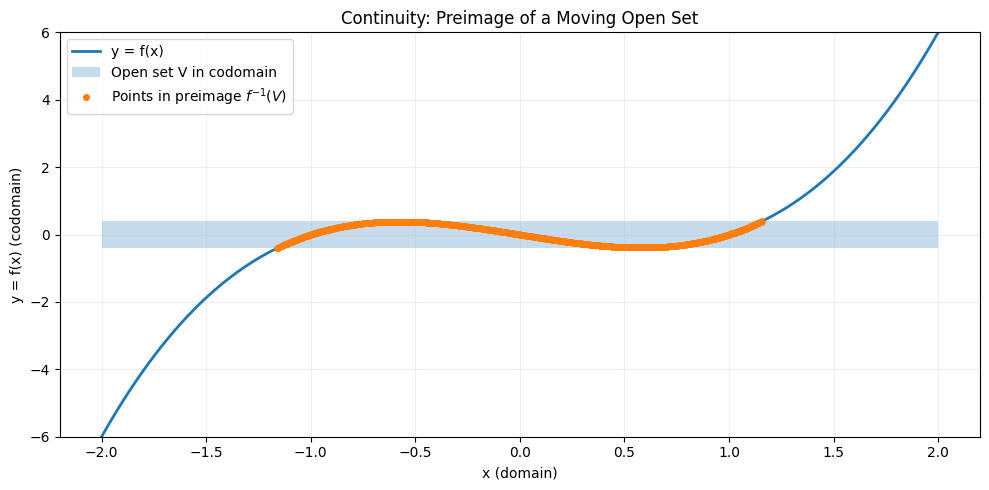

In [10]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# ---------------------------------------------
# 1. Define the continuous function f: R -> R
# ---------------------------------------------
def f(x):
    return x**3 - x  # smooth, continuous

# ---------------------------------------------
# 2. Sample the domain (JAX) and compute f(x)
# ---------------------------------------------
x_jax = jnp.linspace(-2.0, 2.0, 1000)
y_jax = f(x_jax)

# Convert once to NumPy for plotting
x = np.asarray(x_jax)
y = np.asarray(y_jax)

# ---------------------------------------------
# 3. Parameters for the moving open set V_t
#    V_t = (a_t, b_t) with center c_t and half-width h
# ---------------------------------------------
h = 0.4          # half-width of the open interval in y
y_center_min = -1.0
y_center_max =  1.0

# We'll slide the center up and down sinusoidally
def center_t(t, T):
    # t in [0, T-1]
    phase = 2 * np.pi * t / T
    return (y_center_min + y_center_max)/2 + \
           (y_center_max - y_center_min)/2 * np.sin(phase)

# ---------------------------------------------
# 4. Set up the plot
# ---------------------------------------------
fig, ax = plt.subplots(figsize=(10, 5))

# Graph of f
(line_f,) = ax.plot(x, y, linewidth=2, label="y = f(x)")

# Initial band
c0 = center_t(0, T=200)
a0, b0 = c0 - h, c0 + h

# Horizontal band as a Rectangle patch
xmin, xmax = x.min(), x.max()
from matplotlib.patches import Rectangle
band = Rectangle(
    (xmin, a0),            # (x, y) lower-left corner
    xmax - xmin,           # width
    b0 - a0,               # height
    alpha=0.25,
    label="Open set V in codomain"
)
ax.add_patch(band)

# Initial mask and scatter for preimage points
mask0 = (y > a0) & (y < b0)
(scatter_preimage,) = ax.plot(
    x[mask0], y[mask0],
    linestyle="",
    marker="o",
    markersize=4,
    label=r"Points in preimage $f^{-1}(V)$"
)

ax.set_xlabel("x (domain)")
ax.set_ylabel("y = f(x) (codomain)")
ax.set_title("Continuity: Preimage of a Moving Open Set")
ax.grid(alpha=0.2)
ax.legend(loc="upper left")

# Fix y-limits so the band motion is visible
ax.set_ylim(-6, 6)

plt.tight_layout()

# ---------------------------------------------
# 5. Animation update function
# ---------------------------------------------
T = 200  # number of frames

def update(frame):
    # Update center and interval
    c = center_t(frame, T)
    a, b = c - h, c + h

    # Update band position
    band.set_y(a)
    band.set_height(b - a)

    # Recompute preimage mask
    mask = (y > a) & (y < b)

    # Update scatter data
    scatter_preimage.set_data(x[mask], y[mask])

    return band, scatter_preimage

# ---------------------------------------------
# 6. Create the animation
# ---------------------------------------------
anim = FuncAnimation(fig, update, frames=T, interval=50, blit=True)

# If you're in a Jupyter notebook, this will display the animation inline:
# from IPython.display import HTML
# HTML(anim.to_jshtml())

# Or to save as an mp4:
# anim.save("continuity_preimage_animation.mp4", fps=30, dpi=150)

plt.show()
